In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_excel('신뢰성공학 실습 6주차AirConditionerReliability.xlsx')
df.head()

,Type,Failure
0,1,94
1,1,109
2,1,150
3,1,179
4,1,212


In [2]:
df.describe()

,Type,Failure
count,213.000000,213.000000
mean,2.051643,982.342723
std,0.772254,630.475285
min,1.000000,23.000000
25%,1.000000,464.000000
50%,2.000000,907.000000
75%,3.000000,1482.000000
max,3.000000,2722.000000


In [3]:
df['Failure']

0        94
1       109
2       150
3       179
4       212
       ... 
208     921
209     951
210    1117
211    1278
212    1312
Name: Failure, Length: 213, dtype: int64

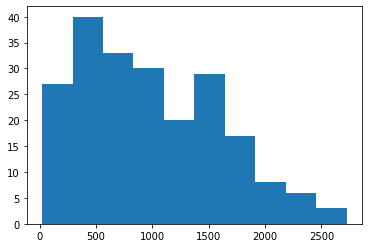

In [4]:
plt.hist(df['Failure'])
plt.show()

In [5]:
df['Type'].unique()

array([1, 2, 3])

In [6]:
type1_item=df[df['Type']==1].Failure
type2_item=df[df['Type']==2]['Failure']
type3_item=df[df['Type']==3]['Failure']
type1_item

0       94
1      109
2      150
3      179
4      212
5      393
6      313
7      327
8      385
9      422
10     522
11     587
12     596
13     800
14    1312
15    1496
16    1532
17    1733
18    1851
19    1885
20    1916
21    2034
22    2052
23    2119
24    2276
25    2338
26    2445
27    2467
28    2501
29      90
30     100
31     160
32     346
33     407
34     456
35     470
36     494
37     550
38     570
39     649
40     733
41     777
42     836
43     965
44     983
45    1008
46    1064
47    1474
48    1550
49    1576
50    1620
51    1643
52    1705
53    1835
54    2143
55    2313
56    2414
57    2722
Name: Failure, dtype: int64

In [7]:
type1_item.describe()

count      58.000000
mean     1149.982759
std       808.414226
min        90.000000
25%       430.500000
50%       974.000000
75%      1847.000000
max      2722.000000
Name: Failure, dtype: float64

In [8]:
type2_item.describe()

count      86.000000
mean     1044.883721
std       584.649506
min        23.000000
25%       544.750000
50%      1073.500000
75%      1503.500000
max      2379.000000
Name: Failure, dtype: float64

In [9]:
type3_item.describe()

count      69.000000
mean      763.478261
std       432.035831
min        50.000000
25%       380.000000
50%       715.000000
75%      1052.000000
max      1800.000000
Name: Failure, dtype: float64

In [10]:
type1_MTTF=type1_item.describe()['mean']
type1_B25=type1_item.describe()['25%']
type2_MTTF=type2_item.describe()['mean']
type2_B25=type2_item.describe()['25%']
type3_MTTF=type3_item.describe()['mean']
type3_B25=type3_item.describe()['25%']
print('type1_MTTF = ',type1_MTTF)
print('type1_B25 = ',type1_B25)
print('type2_MTTF = ',type2_MTTF)
print('type2_B25 = ',type2_B25)
print('type3_MTTF = ',type3_MTTF)
print('type3_B25 = ',type3_B25)

type1_MTTF =  1149.9827586206898
type1_B25 =  430.5
type2_MTTF =  1044.8837209302326
type2_B25 =  544.75
type3_MTTF =  763.4782608695652
type3_B25 =  380.0


Type 1
Group 
     Type  Failure
0      1       94
1      1      109
2      1      150
3      1      179
4      1      212
5      1      393
6      1      313
7      1      327
8      1      385
9      1      422
10     1      522
11     1      587
12     1      596
13     1      800
14     1     1312
15     1     1496
16     1     1532
17     1     1733
18     1     1851
19     1     1885
20     1     1916
21     1     2034
22     1     2052
23     1     2119
24     1     2276
25     1     2338
26     1     2445
27     1     2467
28     1     2501
29     1       90
30     1      100
31     1      160
32     1      346
33     1      407
34     1      456
35     1      470
36     1      494
37     1      550
38     1      570
39     1      649
40     1      733
41     1      777
42     1      836
43     1      965
44     1      983
45     1     1008
46     1     1064
47     1     1474
48     1     1550
49     1     1576
50     1     1620
51     1     1643
52     1     1705
53     1     

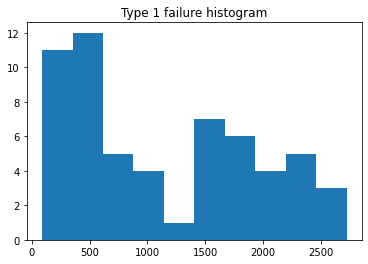

Type 2
Group 
      Type  Failure
58      2       74
59      2      131
60      2      179
61      2      208
62      2      710
..    ...      ...
139     2     1678
140     2     2069
141     2     2087
142     2     2155
143     2     2379

[86 rows x 2 columns]


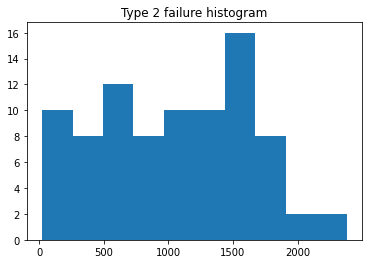

Type 3
Group 
      Type  Failure
144     3       50
145     3       94
146     3      196
147     3      268
148     3      290
..    ...      ...
208     3      921
209     3      951
210     3     1117
211     3     1278
212     3     1312

[69 rows x 2 columns]


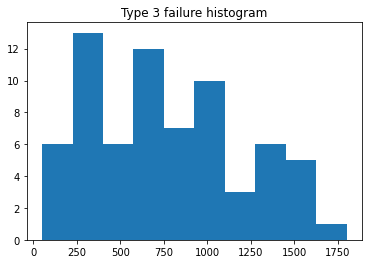

In [11]:
grouped = df.groupby('Type')
for type_, group in grouped:
    print('Type', type_)
    print('Group \n', group)
    plt.hist(group["Failure"])
    plt.title('Type {0} failure histogram'.format(type_))
    plt.show()

In [12]:
a=pd.Series(data=[1,2,3],index=list('sdv'))
a

s    1
d    2
v    3
dtype: int64

In [13]:
in_dex=['({0},{1})'.format(t,t+100)for t in range(0,3000,100)]
cdf = pd.DataFrame(index=in_dex,columns=['Type 1','Type 2','Type 3'])
for i,t in zip(range(0,30),range(0,3000,100)):
	cdf.iloc[i,0]=sum(type1_item<t+100)
	cdf.iloc[i,1]=sum(type2_item<t+100)
	cdf.iloc[i,2]=sum(type3_item<t+100)
cdf

,Type 1,Type 2,Type 3
"(0,100)",2,4,3
"(100,200)",7,9,6
"(200,300)",8,11,8
"(300,400)",13,16,19
"(400,500)",18,19,22
"(500,600)",23,23,27
"(600,700)",24,27,33
"(700,800)",26,32,37
"(800,900)",28,36,42
"(900,1000)",30,39,50


In [14]:
# F(t) 누적확률분포 불신뢰도
t=list(range(0,3100,100))   # 0,100,..,3000
type1_Ft=[0]+[x/len(type1_item)for x in cdf['Type 1']]
type2_Ft=[0]+[x/len(type2_item)for x in cdf['Type 2']]
type3_Ft=[0]+[x/len(type3_item)for x in cdf['Type 3']]
print(len(type1_item)) # type1_item 원소의 갯수

58


In [15]:
len(cdf['Type 1'])

30

In [16]:
type1_Ft

[0,
 0.034482758620689655,
 0.1206896551724138,
 0.13793103448275862,
 0.22413793103448276,
 0.3103448275862069,
 0.39655172413793105,
 0.41379310344827586,
 0.4482758620689655,
 0.4827586206896552,
 0.5172413793103449,
 0.5517241379310345,
 0.5517241379310345,
 0.5517241379310345,
 0.5689655172413793,
 0.603448275862069,
 0.6551724137931034,
 0.6896551724137931,
 0.7241379310344828,
 0.7758620689655172,
 0.7931034482758621,
 0.8275862068965517,
 0.8620689655172413,
 0.8793103448275862,
 0.9137931034482759,
 0.9655172413793104,
 0.9827586206896551,
 0.9827586206896551,
 1.0,
 1.0,
 1.0]

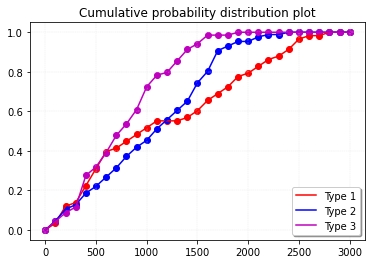

In [17]:
plt.plot(t,type1_Ft,color='r',label='Type 1') # x축, y축, 색깔, 라벨
plt.plot(t,type2_Ft,color='b',label='Type 2')
plt.plot(t,type3_Ft,color='m',label='Type 3')

plt.scatter(t,type1_Ft,color='r')
plt.scatter(t,type2_Ft,color='b')
plt.scatter(t,type3_Ft,color='m')

plt.title('Cumulative probability distribution plot')
plt.grid(True,lw=0.4,ls='--',c='.90')
plt.legend(shadow=True,fancybox=True,loc='lower right')
plt.show()

In [18]:
# R(t) 누적확률분포 신뢰도
t=range(0,3100,100)
type1_Rt=[1]+[1-x/len(type1_item)for x in cdf['Type 1']]
type2_Rt=[1]+[1-x/len(type2_item)for x in cdf['Type 2']]
type3_Rt=[1]+[1-x/len(type3_item)for x in cdf['Type 3']]

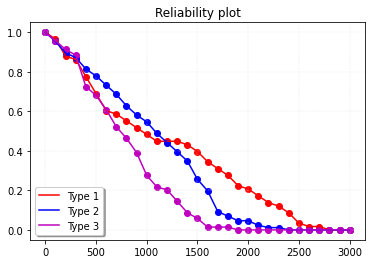

In [19]:
plt.plot(t,type1_Rt,color='r',label='Type 1')
plt.plot(t,type2_Rt,color='b',label='Type 2')
plt.plot(t,type3_Rt,color='m',label='Type 3')
plt.scatter(t,type1_Rt,color='r')
plt.scatter(t,type2_Rt,color='b')
plt.scatter(t,type3_Rt,color='m')

plt.title('Reliability plot')
plt.grid(True,lw=0.4,ls='--',c='.90')
plt.legend(shadow=True,fancybox=True,loc='lower left')
plt.show()

In [20]:
# 고장밀도함수 f(t)
t= [t_+50 for t_ in range(0,3000,100)]

type1_ft=[cdf.iloc[0,0]/(len(type1_item)*100)]
for i in range(1,len(cdf.index)):
  type1_ft.append((cdf.iloc[i,0]-cdf.iloc[i-1,0])/(len(type1_item)*100))
type2_ft=[cdf.iloc[0,1]/(len(type2_item)*100)]
for i in range(1,len(cdf.index)):
  type2_ft.append((cdf.iloc[i,1]-cdf.iloc[i-1,1])/(len(type2_item)*100))
type3_ft=[cdf.iloc[0,2]/(len(type3_item)*100)]
for i in range(1,len(cdf.index)):
  type3_ft.append((cdf.iloc[i,2]-cdf.iloc[i-1,2])/(len(type3_item)*100))
 

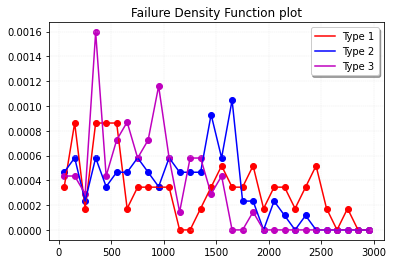

In [21]:
plt.plot(t,type1_ft,color='r',label='Type 1')
plt.plot(t,type2_ft,color='b',label='Type 2')
plt.plot(t,type3_ft,color='m',label='Type 3')

plt.scatter(t,type1_ft,color='r')
plt.scatter(t,type2_ft,color='b')
plt.scatter(t,type3_ft,color='m')

plt.title('Failure Density Function plot')
plt.grid(True,lw=0.4,ls='--',c='.90')
plt.legend(shadow=True,fancybox=True,loc='upper right')
plt.show()

In [22]:
# 순간고장률 h(t)
t = [t_+50 for t_ in range(0,3000,100)]

type1_failure = 0
type1_ht=[cdf.iloc[0,0]/(len(type1_item)*100)]
for i in range(1, len(cdf.index)):
    type1_ht.append((cdf.iloc[i,0]-cdf.iloc[i-1,0])/((len(type1_item)-type1_failure)*100))
    type1_failure += cdf.iloc[i,0]-cdf.iloc[i-1,0]
    
type2_failure = 0
type2_ht=[cdf.iloc[0,1]/(len(type2_item)*100)]
for i in range(1, len(cdf.index)):
    type2_ht.append((cdf.iloc[i,1]-cdf.iloc[i-1,1])/((len(type2_item)-type2_failure)*100))
    type2_failure += cdf.iloc[i,1]-cdf.iloc[i-1,1]  

type3_failure = 0
type3_ht=[cdf.iloc[0,2]/(len(type3_item)*100)]
for i in range(1, len(cdf.index)):
    type3_ht.append((cdf.iloc[i,2]-cdf.iloc[i-1,2])/((len(type3_item)-type3_failure)*100))
    type3_failure += cdf.iloc[i,2]-cdf.iloc[i-1,2]  

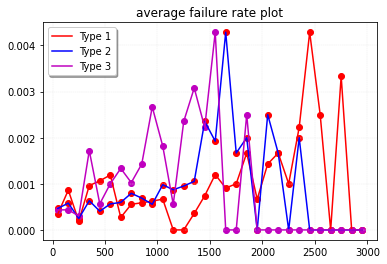

In [23]:
plt.plot(t,type1_ht, color = 'r',label = 'Type 1')
plt.plot(t,type2_ht, color = 'b',label = 'Type 2')
plt.plot(t,type3_ht, color = 'm',label = 'Type 3')

plt.scatter(t,type1_ht, color = 'r')
plt.scatter(t,type2_ht, color = 'r')
plt.scatter(t,type3_ht, color = 'm')

plt.title('average failure rate plot')
plt.grid(True,lw=0.4,ls='--',c='.90')
plt.legend(shadow=True,fancybox=True,loc='upper left')
plt.show()

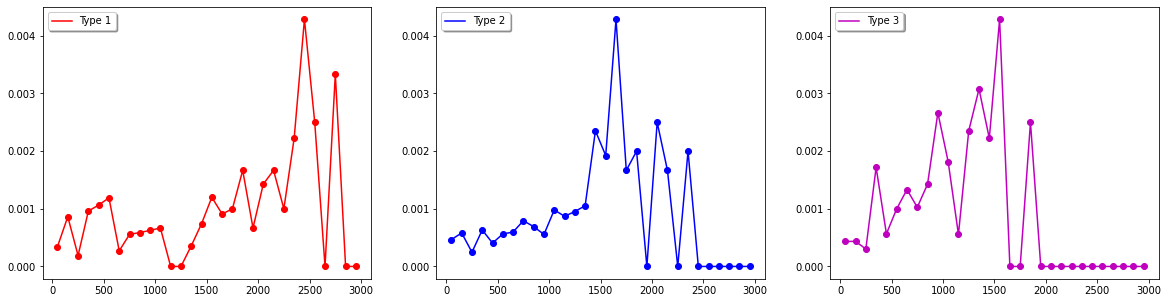

In [24]:
fig = plt.figure()
fig.set_size_inches(20,5) # 크기지정
ax_1 = fig.add_subplot(1,3,1)
ax_2 = fig.add_subplot(1,3,2)
ax_3 = fig.add_subplot(1,3,3)

ax_1.plot(t,type1_ht, color = 'r',label = 'Type 1')
ax_1.scatter(t,type1_ht, color = 'r')
ax_1.legend(shadow=True,fancybox=True,loc='upper left')

ax_2.plot(t,type2_ht, color = 'b',label = 'Type 2')
ax_2.scatter(t,type2_ht, color = 'b')
ax_2.legend(shadow=True,fancybox=True,loc='upper left')

ax_3.plot(t,type3_ht, color = 'm',label = 'Type 3')
ax_3.scatter(t,type3_ht, color = 'm')
ax_3.legend(shadow=True,fancybox=True,loc='upper left')

plt.show()

In [ ]:
# 오케이